# Copyright Netherlands eScience Center <br>
** Function     : Lead/Lag regression of AMET on OMET - A check for Bjerknes compensation ** <br>
** Author       : Yang Liu ** <br>
** First Built  : 2018.06.07 ** <br>
** Last Update  : 2018.07.20 ** <br>
Description  : <br>
Return Values : jpeg <br>

In [1]:
%matplotlib inline

import sys
sys.path.append("/home/yang/NLeSC/Computation_Modeling/Bjerknes/Scripts/META")
import numpy as np
import scipy
from netCDF4 import Dataset
import matplotlib
import matplotlib.pyplot as plt
import os
import meta.statistics
import meta.visualizer

Initialization - Start with location of input and extraction of variables
Time span of each product:
- **ERA-Interim** 1979 - 2016
- **MERRA2**      1980 - 2016
- **JRA55**       1979 - 2015
- **ORAS4**       1958 - 2014
- **GLORYS2V3**   1993 - 2014
- **SODA3**       1980 - 2015

In [2]:
if __name__=="__main__":
    # sample
    ################################   Input zone  ######################################
    # specify data path
    datapath_ERAI = '/home/yang/workbench/Core_Database_AMET_OMET_reanalysis/ERAI/postprocessing'
    datapath_MERRA2 = '/home/yang/workbench/Core_Database_AMET_OMET_reanalysis/MERRA2/postprocessing'
    datapath_ORAS4 = '/home/yang/workbench/Core_Database_AMET_OMET_reanalysis/ORAS4/postprocessing'
    datapath_SODA3 = '/home/yang/workbench/Core_Database_AMET_OMET_reanalysis/SODA3/postprocessing'
    datapath_ERAI_fields = '/home/yang/workbench/Core_Database_AMET_OMET_reanalysis/ERAI/regression'
    output_path = '/home/yang/NLeSC/Computation_Modeling/Bjerknes/Compensation/MET_leadlag'
    #####################################################################################
    print ('*********************** extract variables *************************')
    dataset_ERAI_fields_SIC_SST_SLP = Dataset(os.path.join(datapath_ERAI_fields,
                                                           'surface_ERAI_monthly_regress_1979_2016.nc'))
    dataset_ERAI_AMET = Dataset(os.path.join(datapath_ERAI,
                                             'model_daily_075_1979_2016_E_zonal_int.nc'))
    dataset_MERRA2_AMET = Dataset(os.path.join(datapath_MERRA2,
                                               'AMET_MERRA2_model_daily_1980_2016_E_zonal_int.nc'))
    dataset_ORAS4_OMET = Dataset(os.path.join(datapath_ORAS4,
                                              'oras4_model_monthly_orca1_E_zonal_int.nc'))
    dataset_SODA3_OMET = Dataset(os.path.join(datapath_SODA3,
                                              'OMET_SODA3_model_5daily_1980_2015_E_zonal_int.nc'))
    # extract time series from 1979 to 2014
    # from 20N - 90N
    # MET
    AMET_ERAI_reverse = dataset_ERAI_AMET.variables['E'][:]/1000 # from Tera Watt to Peta Watt
    AMET_MERRA2 = dataset_MERRA2_AMET.variables['E'][:]/1000
    OMET_ORAS4 = dataset_ORAS4_OMET.variables['E'][21:,:,180:]/1000 # from Tera Watt to Peta Watt # start from 1979
    OMET_SODA3 = dataset_SODA3_OMET.variables['E'][:,:,569:]/1000
    # other dimensions
    year_ORAS4 = dataset_ORAS4_OMET.variables['year'][21:]    # from 1979 to 2014
    year_SODA3 = dataset_SODA3_OMET.variables['year'][:]
    latitude_OMET_ORAS4 = dataset_ORAS4_OMET.variables['latitude_aux'][180:]
    latitude_OMET_SODA3 = dataset_SODA3_OMET.variables['latitude_aux'][569:]
    latitude_AMET_ERAI_reverse = dataset_ERAI_AMET.variables['latitude'][:]
    latitude_AMET_MERRA2 = dataset_MERRA2_AMET.variables['latitude'][:]
    # since OMET is from 20N - 90N, AMET is from 90N to 20N, we have to reverse it
    # for interpolation, x should be monotonically increasing
    latitude_AMET_ERAI = latitude_AMET_ERAI_reverse[::-1]
    AMET_ERAI = AMET_ERAI_reverse[:,:,::-1]

*********************** extract variables *************************


Perform interpolation as AMET and OMET has different resoltion in terms of the latitudes.

In [3]:
    print ('*******************  interpolation for regression   **********************')
    # interpolate OMET on the latitude of AMET
    # ORAS4 - ERAI
    OMET_ORAS4_interp_ERAI = meta.statistics.operator.interpolation(OMET_ORAS4, 
                                           latitude_OMET_ORAS4, latitude_AMET_ERAI)
    # an easy check for the interpolation
    #plt.plot(latitude_AMET_ERAI,OMET_ORAS4_interp[2,11,:],linewidth=6.0)
    #plt.plot(latitude_OMET_ORAS4,OMET_ORAS4[2,11,:])
    
    # ORAS4 - MERRA2
    OMET_ORAS4_interp_MERRA2 = meta.statistics.operator.interpolation(OMET_ORAS4, 
                                           latitude_OMET_ORAS4, latitude_AMET_MERRA2)
    # SODA3 - ERAI
    OMET_SODA3_interp_ERAI = meta.statistics.operator.interpolation(OMET_SODA3, 
                                           latitude_OMET_SODA3, latitude_AMET_ERAI)
    # SODA3 - MERRA2
    OMET_SODA3_interp_MERRA2 = meta.statistics.operator.interpolation(OMET_SODA3, 
                                           latitude_OMET_SODA3, latitude_AMET_MERRA2)    

*******************  interpolation for regression   **********************


*******************  postprocess with statistical tool  *********************
!@#$%^&* Lead/ Lag regression of ORAS4 - ERAI !@#$%^&*
The input data has the dimension of month.
The output anomaly time series only contains one dimension for time!
The input data has the dimension of month.
The output anomaly time series only contains one dimension for time!
One time series is regressed on another.
Create x-y plot of correlation coefficient.


/home/yang/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:106: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/yang/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:118: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


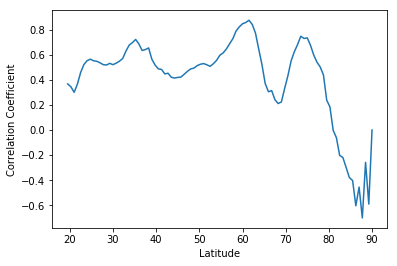

One time series is regressed on another.
This a regression with lead/lag analysis.
Create contour plot of correlation coefficient.


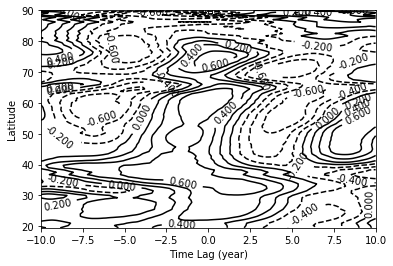

In [4]:
    print ('*******************  postprocess with statistical tool  *********************')
    print ('!@#$%^&* Lead/ Lag regression of ORAS4 - ERAI !@#$%^&*')
    stat_AMET_ERAI = meta.statistics.operator(AMET_ERAI[:-2,:,:])
    stat_AMET_ERAI.anomaly()
    stat_AMET_ERAI.detrend()
    # by default, the running mean is taken with a window of 60 months
    #stat_AMET_ERAI.lowpass()
    stat_AMET_ERAI.lowpass(obj='detrend')
    stat_OMET_ORAS4 = meta.statistics.operator(OMET_ORAS4_interp_ERAI)
    stat_OMET_ORAS4.anomaly()
    stat_OMET_ORAS4.detrend()
    #stat_OMET_ORAS4.lowpass()
    stat_OMET_ORAS4.lowpass(obj='detrend')
    #print (stat_OMET_ORAS4._lowpass.shape)
    k, r, p = meta.statistics.operator.linearRegress(stat_AMET_ERAI._lowpass,
                                                     stat_OMET_ORAS4._lowpass)
    meta.visualizer.plots.linearRegress(latitude_AMET_ERAI, r,
                                        os.path.join(output_path,'regress_ERAI_ORAS4.png'))
    # set the lead lag
    lag = 120
    k, r, p = meta.statistics.operator.linearRegress(stat_AMET_ERAI._lowpass,
                                                     stat_OMET_ORAS4._lowpass, lag)
    meta.visualizer.plots.leadlagRegress(latitude_AMET_ERAI, r, lag,
                                        os.path.join(output_path,'leadlag_ERAI_ORAS4.png'))

!@#$%^&* Lead/ Lag regression of ORAS4 - MERRA2 !@#$%^&*
The input data has the dimension of month.
The output anomaly time series only contains one dimension for time!
The input data has the dimension of month.
The output anomaly time series only contains one dimension for time!
One time series is regressed on another.
Create x-y plot of correlation coefficient.


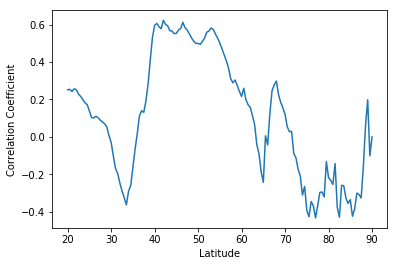

One time series is regressed on another.
This a regression with lead/lag analysis.
Create contour plot of correlation coefficient.


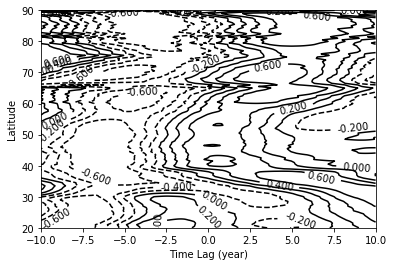

In [5]:
    print ('!@#$%^&* Lead/ Lag regression of ORAS4 - MERRA2 !@#$%^&*')
    stat_AMET_MERRA2 = meta.statistics.operator(AMET_MERRA2[:-2,:,:])
    stat_AMET_MERRA2.anomaly()
    stat_AMET_MERRA2.detrend()
    # by default, the running mean is taken with a window of 60 months
    #stat_AMET_MERRA2.lowpass()
    stat_AMET_MERRA2.lowpass(obj='detrend')
    stat_OMET_ORAS4 = meta.statistics.operator(OMET_ORAS4_interp_MERRA2[1:,:,:])
    stat_OMET_ORAS4.anomaly()
    stat_OMET_ORAS4.detrend()
    #stat_OMET_ORAS4.lowpass()
    stat_OMET_ORAS4.lowpass(obj='detrend')
    k, r, p = meta.statistics.operator.linearRegress(stat_AMET_MERRA2._lowpass,stat_OMET_ORAS4._lowpass)
    meta.visualizer.plots.linearRegress(latitude_AMET_MERRA2, r,
                                        os.path.join(output_path,'regress_MERRA2_ORAS4.png'))
    # set the lead lag
    lag = 120
    k, r, p = meta.statistics.operator.linearRegress(stat_AMET_MERRA2._lowpass,
                                                     stat_OMET_ORAS4._lowpass, lag)
    meta.visualizer.plots.leadlagRegress(latitude_AMET_MERRA2, r, lag,
                                        os.path.join(output_path,'leadlag_MERRA2_ORAS4.png'))    

!@#$%^&* Lead/ Lag regression of SODA3 - ERAI !@#$%^&*
The input data has the dimension of month.
The output anomaly time series only contains one dimension for time!
The input data has the dimension of month.
The output anomaly time series only contains one dimension for time!
One time series is regressed on another.
Create x-y plot of correlation coefficient.


/home/yang/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:106: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/yang/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:118: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


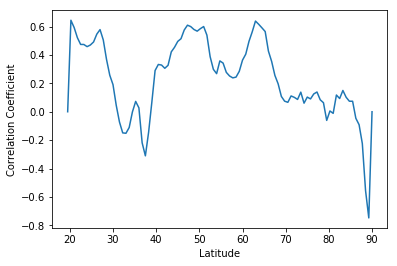

One time series is regressed on another.
This a regression with lead/lag analysis.
Create contour plot of correlation coefficient.


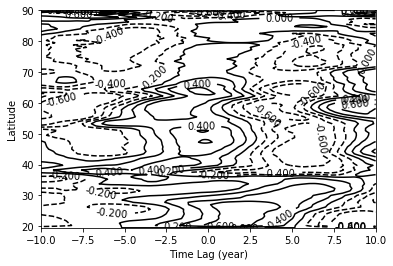

In [6]:
    print ('!@#$%^&* Lead/ Lag regression of SODA3 - ERAI !@#$%^&*')
    stat_AMET_ERAI = meta.statistics.operator(AMET_ERAI[1:-1,:,:])
    stat_AMET_ERAI.anomaly()
    stat_AMET_ERAI.detrend()
    # by default, the running mean is taken with a window of 60 months
    #stat_AMET_ERAI.lowpass()
    stat_AMET_ERAI.lowpass(obj='detrend')
    stat_OMET_SODA3 = meta.statistics.operator(OMET_SODA3_interp_ERAI)
    stat_OMET_SODA3.anomaly()
    stat_OMET_SODA3.detrend()
    #stat_OMET_SODA3.lowpass()
    stat_OMET_SODA3.lowpass(obj='detrend')
    k, r, p = meta.statistics.operator.linearRegress(stat_AMET_ERAI._lowpass,
                                                     stat_OMET_SODA3._lowpass)
    meta.visualizer.plots.linearRegress(latitude_AMET_ERAI, r,
                                        os.path.join(output_path,'regress_ERAI_SODA3.png'))
    # set the lead lag
    lag = 120
    k, r, p = meta.statistics.operator.linearRegress(stat_AMET_ERAI._lowpass,
                                                     stat_OMET_SODA3._lowpass, lag)
    meta.visualizer.plots.leadlagRegress(latitude_AMET_ERAI, r, lag,
                                        os.path.join(output_path,'leadlag_ERAI_SODA3.png'))

!@#$%^&* Lead/ Lag regression of SODA3 - MERRA2 !@#$%^&*
The input data has the dimension of month.
The output anomaly time series only contains one dimension for time!
The input data has the dimension of month.
The output anomaly time series only contains one dimension for time!
One time series is regressed on another.
Create x-y plot of correlation coefficient.


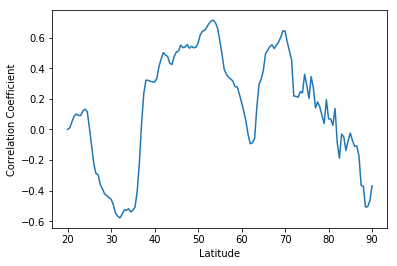

One time series is regressed on another.
This a regression with lead/lag analysis.
Create contour plot of correlation coefficient.


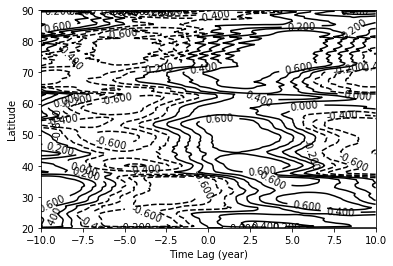

In [7]:
    print ('!@#$%^&* Lead/ Lag regression of SODA3 - MERRA2 !@#$%^&*')
    stat_AMET_MERRA2 = meta.statistics.operator(AMET_MERRA2[:-1,:,:])
    stat_AMET_MERRA2.anomaly()
    stat_AMET_MERRA2.detrend()
    # by default, the running mean is taken with a window of 60 months
    #stat_AMET_ERAI.lowpass()
    stat_AMET_MERRA2.lowpass(obj='detrend')
    stat_OMET_SODA3 = meta.statistics.operator(OMET_SODA3_interp_MERRA2)
    stat_OMET_SODA3.anomaly()
    stat_OMET_SODA3.detrend()
    #stat_OMET_SODA3.lowpass()
    stat_OMET_SODA3.lowpass(obj='detrend')
    k, r, p = meta.statistics.operator.linearRegress(stat_AMET_MERRA2._lowpass,
                                                     stat_OMET_SODA3._lowpass)
    meta.visualizer.plots.linearRegress(latitude_AMET_MERRA2, r,
                                        os.path.join(output_path,'regress_MERRA2_SODA3.png'))
    # set the lead lag
    lag = 120
    k, r, p = meta.statistics.operator.linearRegress(stat_AMET_MERRA2._lowpass,
                                                     stat_OMET_SODA3._lowpass, lag)
    meta.visualizer.plots.leadlagRegress(latitude_AMET_MERRA2, r, lag,
                                        os.path.join(output_path,'leadlag_MERRA2_SODA3.png'))